### overview

In [86]:
!grep 'Reconstruction with' ./data/velo/experiments/*/convert_logs.txt

./data/velo/experiments/scene12_8images/convert_logs.txt:I20240501 13:11:11.809793 23392508 image.cc:342] => Reconstruction with 2 images and 259 points
./data/velo/experiments/scene1_16images/convert_logs.txt:I20240501 13:11:26.334702 23393813 image.cc:342] => Reconstruction with 16 images and 3031 points
./data/velo/experiments/scene1_16images_1k/convert_logs.txt:I20240502 22:01:38.789369 25792318 image.cc:342] => Reconstruction with 15 images and 981 points
./data/velo/experiments/scene1_24images/convert_logs.txt:I20240501 13:18:37.978821 23406544 image.cc:342] => Reconstruction with 16 images and 3039 points
./data/velo/experiments/scene1_8images/convert_logs.txt:I20240501 13:11:31.834527 23394370 image.cc:342] => Reconstruction with 2 images and 254 points
./data/velo/experiments/scene1_8images_1k/convert_logs.txt:I20240501 13:11:35.275399 23394670 image.cc:342] => Reconstruction with 2 images and 93 points
./data/velo/experiments/scene2_8images/convert_logs.txt:I20240501 13:11:39

In [48]:
!grep -B2 -A3 'Loading matches' ./data/*/runs/*/*convert_logs.txt

./data/_velo2/runs/020_images/convert_logs.txt-I20240502 22:00:08.370085 25789352 database_cache.cc:54] Loading cameras...
./data/_velo2/runs/020_images/convert_logs.txt-I20240502 22:00:08.370121 25789352 database_cache.cc:64]  1 in 0.000s
./data/_velo2/runs/020_images/convert_logs.txt:I20240502 22:00:08.370138 25789352 database_cache.cc:72] Loading matches...
./data/_velo2/runs/020_images/convert_logs.txt-I20240502 22:00:08.370252 25789352 database_cache.cc:78]  54 in 0.000s
./data/_velo2/runs/020_images/convert_logs.txt-I20240502 22:00:08.370267 25789352 database_cache.cc:94] Loading images...
./data/_velo2/runs/020_images/convert_logs.txt-I20240502 22:00:08.372380 25789352 database_cache.cc:143]  20 in 0.002s (connected 20)
--
./data/cube_rot/runs/1k/02_convert_logs.txt-I20240507 19:02:29.161707 31124172 database_cache.cc:54] Loading cameras...
./data/cube_rot/runs/1k/02_convert_logs.txt-I20240507 19:02:29.161763 31124172 database_cache.cc:64]  1 in 0.000s
./data/cube_rot/runs/1k/02

In [49]:
!grep 'Reconstruction with' ./data/*/runs/*/*convert_logs.txt

./data/_velo2/runs/020_images/convert_logs.txt:I20240502 22:00:09.394155 25789389 image.cc:342] => Reconstruction with 2 images and 118 points
./data/cube_rot/runs/1k/02_convert_logs.txt:I20240507 19:02:31.181587 31124332 image.cc:342] => Reconstruction with 2 images and 62 points
./data/gitter/runs/baseline/02_convert_logs.txt:I20240512 14:51:09.416323 36158562 image.cc:342] => Reconstruction with 2 images and 91 points
./data/meercat1/runs/10/02_convert_logs.txt:I20240507 12:09:35.701309 30546198 image.cc:342] => Reconstruction with 2 images and 14 points
./data/meercat1/runs/20/02_convert_logs.txt:I20240507 12:09:42.529070 30546920 image.cc:342] => Reconstruction with 2 images and 44 points
./data/meercat1_sel/runs/all/02_convert_logs.txt:I20240507 17:33:15.749194 30975565 image.cc:342] => Reconstruction with 2 images and 25 points
./data/po33_fixed/runs/1024px/02_convert_logs.txt:I20240508 21:39:48.208979 32455326 image.cc:342] => Reconstruction with 2 images and 431 points
./data/

In [60]:
import re

import pandas as pd

matcher_re = re.compile(r'.*Loading matches.*? (?P<matches>\d+) in.*?images.*? (?P<images>\d+) in', re.S)
mapper_re = re.compile(r'.*Reconstruction with (?P<images2>\d+) images and (?P<points>\d+) points', re.S)

rows = []
for path in glob.glob('./data/*/runs/*/*convert_logs.txt'):
  t = open(path).read()
  for r in (matcher_re, mapper_re):
    m = r.match(t)
    if m: d = {**d, **m.groupdict()}
  d = {
      **matcher_re.match(t).groupdict(),
      **mapper_re.match(t).groupdict(),
  }
  rows.append(d)
  # print(path, d)


pd.DataFrame(rows)

AttributeError: 'NoneType' object has no attribute 'groupdict'

### colmap - visu3d

In [303]:
!grep -B 1 'minutes' ./data/po33_fixed/run_logs.txt

20240507_103624 - root - INFO - Starting ['python', '/Users/ast/git/gaussian-splatting/convert.py', '-s', 'colmap']
20240507_104215 - root - INFO - Finished command after 5.8 minutes
--
20240507_104226 - root - INFO - Starting ['python', '/Users/ast/git/gaussian-splatting/extract.py', '--every', '10']
20240507_104226 - root - INFO - Finished command after 0.0 minutes
--
20240507_104226 - root - INFO - Starting ['python', '/Users/ast/git/gaussian-splatting/convert.py', '-s', 'colmap']
20240507_104228 - root - INFO - Finished command after 0.0 minutes
--
20240507_104228 - root - INFO - Starting ['python', '/Users/ast/git/gaussian-splatting/extract.py', '--every', '5']
20240507_104228 - root - INFO - Finished command after 0.0 minutes
--
20240507_104228 - root - INFO - Starting ['python', '/Users/ast/git/gaussian-splatting/convert.py', '-s', 'colmap']
20240507_104236 - root - INFO - Finished command after 0.1 minutes


In [42]:
!grep 'Reconstruction with' ./data/po33_fixed*/runs/*/*_convert_logs.txt

./data/po33_fixed/runs/1024px/02_convert_logs.txt:I20240508 21:39:48.208979 32455326 image.cc:342] => Reconstruction with 2 images and 431 points
./data/po33_fixed/runs/512px/02_convert_logs.txt:I20240508 21:39:51.891645 32455693 image.cc:342] => Reconstruction with 6 images and 3315 points
./data/po33_fixed/runs/baseline/02_convert_logs.txt:I20240508 19:32:06.543519 32254260 image.cc:342] => Reconstruction with 6 images and 3331 points


In [2]:
import glob
import json

import dataclass_array as dca
import einops
import matplotlib.pyplot as plt
import numpy as np
import plyfile
import visu3d as v3d
from visu3d.math import rotation_utils

from utils import space_utils
# import importlib; importlib.reload(space_utils)


In [26]:
exp_dir = './data/po33_fixed/runs/baseline'

# paths = [f'{exp_dir}/colmap/sparse/0/points3D.ply']
paths = [f'{exp_dir}/points3D.ply']
# paths = glob.glob(f'{exp_dir}/models/1k/point_cloud/iteration_*/point_cloud.ply')

ply = plyfile.PlyData.read(paths[0])

print(str(ply).replace('\n', '; '))

vertices = ply['vertex'].data
vertices[0]

ply; format binary_little_endian 1.0; element vertex 3331; property float x; property float y; property float z; property float nx; property float ny; property float nz; property uchar red; property uchar green; property uchar blue; end_header


(1.75693, -1.5360614, 7.573466, 0., 0., 0., 128, 119, 112)

In [27]:
pc = v3d.Point3d(
    p=np.array([vertices['x'], vertices['y'], vertices['z']]).T,
    rgb=np.array([vertices['red']/1, vertices['green']/1, vertices['blue']/1]).T,
)

In [28]:
cameras = json.load(open(f'{exp_dir}/cameras.json'))
# cameras = json.load(open(f'{exp_dir}/colmap/sparse/0/cameras.json'))
# cameras = json.load(open(f'{exp_dir}/models/1k/cameras.json'))
len(cameras), cameras[0]

(6,
 {'id': 1,
  'img_name': '20240508_190928.jpg',
  'width': 3033,
  'height': 3034,
  'position': [-0.9745306074260469, -1.949040102572773, -0.18057680353380864],
  'rotation': [[-0.06921767857328458, 0.8299007790901959, 0.553600586920219],
   [-0.9162692288472388, -0.27235490052255196, 0.29372352379242106],
   [0.3945372140123307, -0.4869163224074915, 0.7792643208389257]],
  'fy': 3170.7116380753846,
  'fx': 3157.3943846843986})

In [29]:
spec = v3d.PinholeCamera.from_focal(
    resolution=[50, 50],
    focal_in_px=50,
)
cams = dca.stack([v3d.Camera(
    spec=spec,
    world_from_cam=v3d.Transform(
        t=c['position'],
        R=c['rotation'],
    )
) for c in cameras])


In [31]:
# cams.fig

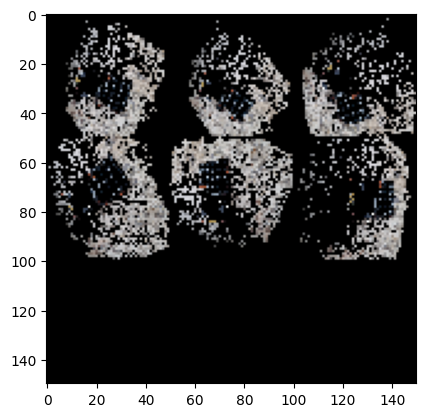

In [32]:
plt.imshow(space_utils.render_tableau(pc, cams))
v3d.make_fig(pc, *cams)

In [40]:
center_t = space_utils.ray_to_transform(space_utils.center_ray(cams))
pc_sel = space_utils.camera_ball(pc, cams, 2)

v3d.make_fig(center_t @ pc_sel, *(center_t @ cam for cam in cams))

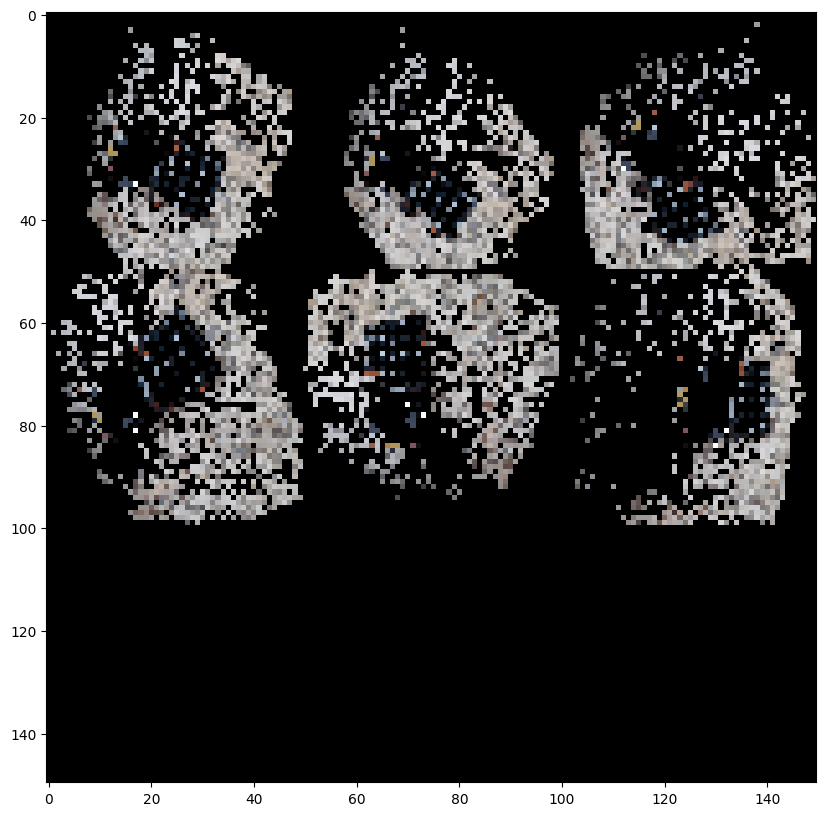

In [41]:
plt.figure(figsize=(10, 10))
plt.imshow(space_utils.render_tableau(pc_sel, cams))

### visu3d - rotations

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.transform import Rotation as R
import visu3d as v3d
import dataclass_array as dca

# cs[0].world_from_cam.t.tolist(), R.from_matrix(cs[0].world_from_cam.R).as_euler('xyz', degrees=True).tolist()
# # ZXY 22, 96, 241


In [14]:
v3d.Transform.from_angle?
# since we multiply from right like `R @ point` this rotates around X
#
# note that an object is rotated by Rx first, then Ry, then Rz - this is an
# *active* rotation, where coordinates before and after the rotation are wrt the
# original reference frame
#
# if we think about the rotations of a new reference frame (e.g. an airplane),
# then the order of this *passive* rotation is reversed, i.e. first yaw around
# the (negative) Z axis, then pitch around the Y axis, and finally Roll on X
#
# in Blender this is called "XYZ Euler", but e.g. in Scipy or in visu3d it would
# be `order="yzx"`

Signature: v3d.Transform.from_angle(*, x=None, y=None, z=None) -> 'Transform'
Docstring:
Returns a transformation rotation around an axis (in radians).

Example:

```python
tr = v3d.Transform.from_angle(x=1/4 * enp.tau)  # Rotate 90° around x
```

Rotations are applied following the Tait-Bryan chained rotations (z, y, x):

```python
R = Rz @ Ry @ Rx
```

See:
https://en.wikipedia.org/wiki/Rotation_formalisms_in_three_dimensions#Euler_angles_(z-y%E2%80%B2-x%E2%80%B3_intrinsic)_%E2%86%92_rotation_matrix

Args:
  x: Rotation around x (in radians): roll == ϕ == phi == x
  y: Rotation around y (in radians): pitch == θ == theta == y
  z: Rotation around z (in radians): yaw == ψ == psi == z

Returns:
  tr: The transformation.
File:      ~/git/gaussian-splatting/env/lib/python3.12/site-packages/visu3d/dc_arrays/transformation.py
Type:      method

In [105]:
# https://en.wikipedia.org/wiki/Davenport_chained_rotations#Tait%E2%80%93Bryan_chained_rotations
# M = Roll(phi) Pitch(theta) Yaw(psi)
# q = M p
# i.e. order 'zyx'


FrozenInstanceError: cannot assign to field 'scale'

In [112]:
from visu3d.math import rotation_utils

Rx = rotation_utils.rot_x(90 * dg)
Ry = rotation_utils.rot_y(45 * dg)

p = np.array([[1., 0, 0]])
Ry @ Rx @ p.T
Ry @ p.T


array([[ 0.70710677],
       [ 0.        ],
       [-0.70710677]])

In [107]:
spec = v3d.PinholeCamera.from_focal(
  resolution=[480, 640], focal_in_px=480,
)

origin = v3d.Transform.from_angle()
transform = v3d.Transform.from_angle()
dg = np.pi / 180
t1 = v3d.Transform.from_angle(x=0 * dg, y = 0*dg)
t2 = v3d.Transform.from_angle(x=0 * dg, y = 45*dg).mul_scale(1.1)
t3 = v3d.Transform.from_angle(x=90 * dg, y = 45*dg).mul_scale(1.2)

# transform.fig
v3d.make_fig(t1, t2, t3)
# rotates around Z (yaw), then Y (pitch), then X (roll)
# note that the airplane heads in X direction, Z downwards

In [36]:
R.as_euler?

Signature:      R.as_euler(self, seq, degrees=False)
Call signature: R.as_euler(*args, **kwargs)
Type:           cython_function_or_method
String form:    <cyfunction Rotation.as_euler at 0x125e18450>
Docstring:     
Rotation.as_euler(self, seq, degrees=False)
Represent as Euler angles.

        Any orientation can be expressed as a composition of 3 elementary
        rotations. Once the axis sequence has been chosen, Euler angles define
        the angle of rotation around each respective axis [1]_.

        The algorithm from [2]_ has been used to calculate Euler angles for the 
        rotation about a given sequence of axes.

        Euler angles suffer from the problem of gimbal lock [3]_, where the
        representation loses a degree of freedom and it is not possible to
        determine the first and third angles uniquely. In this case,
        a warning is raised, and the third angle is set to zero. Note however
        that the returned angles still represent the correct rot

In [43]:
R.from_matrix(
    v3d.Transform.from_angle(x=np.pi/4, y=np.pi/8).R,
).as_euler('xyz', degrees=True).round(1).tolist()

[45.0, 22.5, 0.0]

In [88]:
cam = v3d.Camera(spec=spec, world_from_cam=transform)
cam.fig
v3d.make_fig(cam, cam.world_from_cam)
# looking in the Z direction
# note that Blender camera looks in -Z direction

In [81]:
ball = np.random.uniform(low=-.01, high=.01, size=[1000, 3])
# ball.fig

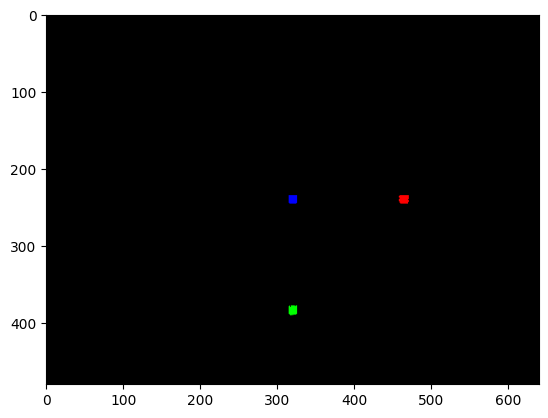

In [85]:
t = 0.3

xy0 = dca.stack([
    v3d.Point3d(p=ball + [[x, y, 1]], rgb=rgb)
    for (x, y), rgb in [
        ((0, 0), [0, 0, 255]),
        ((t, 0), [255, 0, 0]),
        ((0, t), [0, 255, 0]),
    ]
])

img = cam.render(xy0)
plt.imshow(img)

xy0.fig
# note that looking in Z direction flips Y downwards

In [90]:
v3d.Camera.from_look_at?

Signature:
v3d.Camera.from_look_at(
    *,
    pos: "FloatArray['*shape 3']",
    target: "FloatArray['*shape 3']",
    spec: 'camera_spec.CameraSpec',
) -> 'Camera'
Docstring:
Factory which creates a camera looking at `target`.

This assume the camera is parallel to the floor. See `v3d.CameraSpec`
for axis conventions.

Args:
  pos: Origin position
  target: Target position
  spec: Camera specifications.

Returns:
  cam: Camera pointing to the ray.
File:      ~/git/gaussian-splatting/env/lib/python3.12/site-packages/visu3d/dc_arrays/camera.py
Type:      method

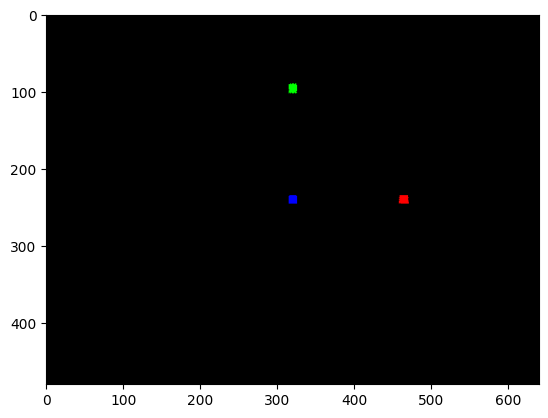

In [98]:
cam2 = v3d.Camera.from_look_at(spec=cam.spec, pos=[0, 0, 2], target=[0, 1e-6, 1])
img = cam2.render(xy0)
plt.imshow(img)
cam2.fig
# looking in negative Z direction has Y "mathematically" going upwards

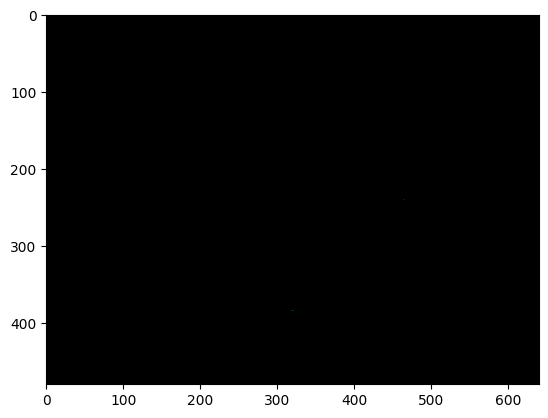

In [83]:
x = 0.3
xy0 = v3d.Point3d(
    p=[
        [0, 0, 1],  # x=0, y=0
        [x, 0, 1],  # x=1, y=0
        [0, x, 1],  # x=0, y=1
    ],
    rgb=[
        [0, 0, 255],  # blue
        [255, 0, 0],  # red
        [0, 255, 0],  # green
    ]
)

img = cam.render(xy0)
plt.imshow(img)
xy0.fig

In [66]:
xy0.size

3

TypeError: object of type 'builtin_function_or_method' has no len()

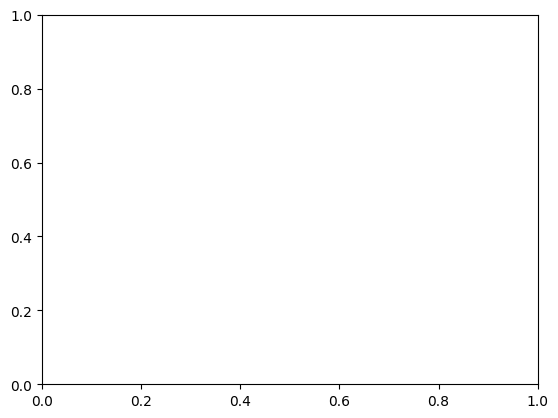

In [61]:
plt.hist(img.flatten)

### colmap

In [199]:
!ls {exp_dir}/models/1k

cameras.json
cfg_args
events.out.tfevents.1714680553.1d65e0b01870.10740.0
events.out.tfevents.1714680642.1d65e0b01870.11130.0
input.ply
point_cloud
train_args.json
train_logs.txt
train_logs.txt_FAILED_20240502_200908
train_logs.txt_FAILED_20240502_220139
train_results.json


In [202]:
import json
cams = json.load(open(f'{exp_dir}/models/1k/cameras.json'))
cams[:1]

[{'id': 0,
  'img_name': '20240425_172506',
  'width': 987,
  'height': 989,
  'position': [4.859608010466648, 0.5923857852803536, 0.7289562901597735],
  'rotation': [[-0.11461107218768438, 0.4023032223347554, -0.9083041447835966],
   [-0.6176829129786227, 0.6872356613957249, 0.3823283467390609],
   [0.7780309255718774, 0.6048630117679975, 0.16973101027424195]],
  'fy': 1026.512786198991,
  'fx': 1015.4110256814981}]

In [206]:
# https://chat.openai.com/c/bf0828ac-2d9c-4131-b426-37b13464b844

def rotation_matrix_to_euler_xyz(R):
  """
  Convert a 3x3 rotation matrix to XYZ Euler angles.

  Parameters:
  R (np.array): 3x3 rotation matrix.

  Returns:
  tuple: (phi, theta, psi) angles in radians, representing roll, pitch, and yaw.
  """
  R = np.asarray(R)
  # Ensure the matrix is of the correct shape and size
  if R.shape != (3, 3):
      raise ValueError("The rotation matrix must be a 3x3 matrix.")

  # Extracting the elements from the matrix
  R11, R12, R13 = R[0, 0], R[0, 1], R[0, 2]
  R21, R22, R23 = R[1, 0], R[1, 1], R[1, 2]
  R31, R32, R33 = R[2, 0], R[2, 1], R[2, 2]

  # Calculating Euler angles for XYZ rotation
  theta = np.arcsin(-R13)
  phi = np.arctan2(R23, R33)
  psi = np.arctan2(R12, R11)

  return phi / np.pi * 180, theta / np.pi * 180, psi / np.pi * 180


rotation_matrix_to_euler_xyz(cams[0]['rotation'])

(66.06163011844087, 65.27203891430248, 105.90157873638991)

In [205]:
np.pi

3.141592653589793

In [87]:
import importlib.util
import os

import numpy as np
import plyfile

colmap_load_spec = importlib.util.spec_from_file_location(
    'colmap_loader',
    os.path.join('scene/colmap_loader.py'))
colmap_loader = importlib.util.module_from_spec(colmap_load_spec)
colmap_load_spec.loader.exec_module(colmap_loader)

In [96]:
exp_dir = './data/velo/experiments/scene1_16images_1k'

intrinsics = colmap_loader.read_intrinsics_binary(
    os.path.join(exp_dir, 'colmap/sparse/0', 'cameras.bin'))
extrinsics = colmap_loader.read_extrinsics_binary(
    os.path.join(exp_dir, 'colmap/sparse/0', 'images.bin'))

print(f'{len(intrinsics)} intrinsics, {len(extrinsics)} extrinsics')

1 intrinsics, 15 extrinsics


In [101]:
intrinsics

{1: Camera(id=1, model='PINHOLE', width=987, height=989, params=array([1015.41102568, 1026.5127862 ,  493.5       ,  494.5       ]))}

In [109]:
sorted([(k, v.name) for k, v in extrinsics.items()])

[(1, '20240425_172506.jpg'),
 (3, '20240425_172542.jpg'),
 (4, '20240425_172546.jpg'),
 (5, '20240425_172557.jpg'),
 (6, '20240425_172600.jpg'),
 (7, '20240425_172611.jpg'),
 (8, '20240425_172614.jpg'),
 (9, '20240425_172625.jpg'),
 (10, '20240425_172628.jpg'),
 (11, '20240425_172639.jpg'),
 (12, '20240425_172642.jpg'),
 (13, '20240425_172653.jpg'),
 (14, '20240425_172656.jpg'),
 (15, '20240425_172708.jpg'),
 (16, '20240425_172710.jpg')]

In [110]:
sorted([(k, len(v.xys)) for k, v in extrinsics.items()])

[(1, 5970),
 (3, 6423),
 (4, 5651),
 (5, 5192),
 (6, 4479),
 (7, 7310),
 (8, 7917),
 (9, 9487),
 (10, 11561),
 (11, 6732),
 (12, 6623),
 (13, 5263),
 (14, 4316),
 (15, 5828),
 (16, 5445)]

In [105]:
e = extrinsics[1]
type(e)

colmap_loader.Image

(array([388., 486., 596., 786., 481., 630., 678., 740., 654., 531.]),
 array([ -6.98474238,  92.84326924, 192.67128087, 292.49929249,
        392.32730411, 492.15531574, 591.98332736, 691.81133899,
        791.63935061, 891.46736224, 991.29537386]),
 <BarContainer object of 10 artists>)

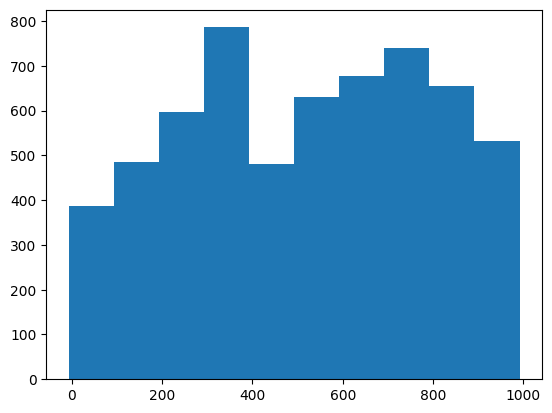

In [125]:
plt.hist(e.xys[:, 0])

(1024, 1024)


(-62.43785306718146, 1023.5, 1023.5, -60.16272965100933)

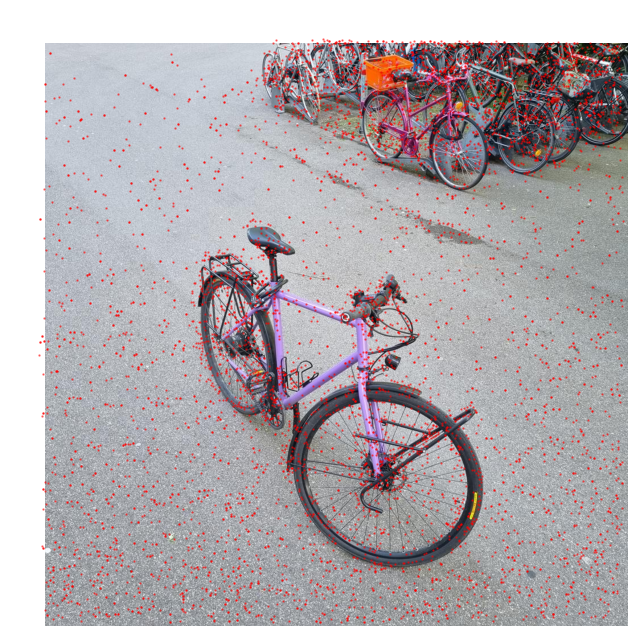

In [130]:
import PIL.Image
e = extrinsics[12]
i = PIL.Image.open(f'{exp_dir}/colmap/input/{e.name}')
print(i.size)
plt.figure(figsize=(8, 8))
plt.imshow(np.array(i))
plt.scatter(*(e.xys * np.array(i.size)[None] / 1e3).T, alpha=0.5, s=0.5, c='r')
plt.axis('off')

In [106]:
e

Image(id=1, qvec=array([ 0.65999159, -0.08429451,  0.63877142,  0.38636331]), tvec=array([ 0.35572092, -2.8030633 ,  4.06378973]), camera_id=1, name='20240425_172506.jpg', xys=array([[ -6.98474238,   1.75891808],
       [ -6.98474238,   1.75891808],
       [ 81.77698695,  -5.15421014],
       ...,
       [528.01223212, 386.44305771],
       [147.06961938, 197.8695134 ],
       [677.40168412, 435.79707366]]), point3D_ids=array([-1, -1, -1, ..., -1, -1, -1]))

In [54]:
images[135]

Image(id=135, qvec=array([ 0.9874477 ,  0.0066928 , -0.15066845, -0.04691769]), tvec=array([4.99803087, 0.12074342, 0.07146131]), camera_id=1, name='frame_135.jpg', xys=array([[ 519.59455391, -549.42522117],
       [ 536.65668851, -526.52404126],
       [ 552.60375716, -531.46684574],
       ...,
       [1102.80586916,   79.24593422],
       [ 905.45303947,  351.70598008],
       [ 547.59330095, -519.11485378]]), point3D_ids=array([-1, -1, -1, ..., -1, -1, -1]))

### results

In [75]:
!ls -d ./data/*/experiments/*/models/*

./data/_velo2/experiments/158_images/models/test
./data/velo/experiments/scene12_8images/models/1k
./data/velo/experiments/scene1_8images/models/10k
./data/velo/experiments/scene1_8images/models/1k
./data/velo2/experiments/158_images/models/test


In [83]:
!ls -lh ./data/*/experiments/*/models/*/point_cloud/*/*

-rw-rw-r--@ 1 ast  staff   247M May  2 21:47 ./data/velo/experiments/scene12_8images/models/1k/point_cloud/iteration_30000/point_cloud.ply
-rw-rw-r--@ 1 ast  staff    65M May  2 21:47 ./data/velo/experiments/scene12_8images/models/1k/point_cloud/iteration_7000/point_cloud.ply
-rw-------@ 1 ast  staff   114K May  2 13:12 ./data/velo/experiments/scene1_8images/models/1k/point_cloud/iteration_1000/point_cloud.ply
-rw-------@ 1 ast  staff   227M May  2 15:57 ./data/velo/experiments/scene1_8images/models/1k/point_cloud/iteration_10000/point_cloud.ply
-rw-------@ 1 ast  staff   167M May  2 15:46 ./data/velo/experiments/scene1_8images/models/1k/point_cloud/iteration_7000/point_cloud.ply


In [76]:
!tree -sh ./data/velo/experiments/scene1_8images/models/10k

[  64]  ./data/velo/experiments/scene1_8images/models/10k

0 directories, 0 files


### tensorboard

In [43]:
import tbparse

In [45]:
!ls ./data/*/runs/*/models/*/*.tfevents.*

./data/meercat1_sel/runs/all/models/1k/events.out.tfevents.1715100177.f52e8a18bc3d.3388.0
./data/po33_fixed/runs/1024px/models/1k/events.out.tfevents.1715197302.1951604e17ee.9315.0
./data/po33_fixed/runs/1024px/models/2k/events.out.tfevents.1715197330.1951604e17ee.9449.0
./data/po33_fixed/runs/1024px/models/4k/events.out.tfevents.1715197366.1951604e17ee.9613.0
./data/po33_fixed/runs/512px/models/1k/events.out.tfevents.1715197433.1951604e17ee.9917.0
./data/po33_fixed/runs/512px/models/2k/events.out.tfevents.1715197498.1951604e17ee.10199.0
./data/po33_fixed/runs/512px/models/4k/events.out.tfevents.1715197604.1951604e17ee.10663.0
./data/po33_fixed/runs/baseline/models/1k/events.out.tfevents.1715195903.1951604e17ee.3247.0
./data/po33_fixed/runs/baseline/models/1k_eval_indices_5/events.out.tfevents.1715201594.1951604e17ee.28020.0
./data/po33_fixed/runs/baseline/models/2k/events.out.tfevents.1715196028.1951604e17ee.3810.0
./data/po33_fixed/runs/baseline/models/4k/events.out.tfevents.17151962

In [46]:
# reader = tbparse.SummaryReader('./data/velo/experiments/scene12_8images/models/1k')
reader = tbparse.SummaryReader('./data/po33_fixed')
print(reader.scalars.tag.unique())
reader.scalars.head(2)

['iter_time' 'train_loss_patches/l1_loss' 'train_loss_patches/total_loss']


,step,tag,value
0,1,iter_time,746.844177
1,1,iter_time,719.183350


In [47]:
len(reader.scalars)

66000

In [62]:
df = reader.scalars\
.drop_duplicates(['step', 'tag'])\
.pivot(index='step', columns='tag', values='value')\
df.head()

tag,iter_time,test/loss_viewpoint - l1_loss,test/loss_viewpoint - psnr,total_points,train/loss_viewpoint - l1_loss,train/loss_viewpoint - psnr,train_loss_patches/l1_loss,train_loss_patches/total_loss
step,,,,,,,,
1,77.657089,NaN,NaN,NaN,NaN,NaN,0.464544,0.554981
2,58.912769,NaN,NaN,NaN,NaN,NaN,0.456975,0.548411
3,62.936066,NaN,NaN,NaN,NaN,NaN,0.449265,0.541726
4,61.360126,NaN,NaN,NaN,NaN,NaN,0.441428,0.534937
5,59.153408,NaN,NaN,NaN,NaN,NaN,0.433478,0.528053


<Axes: xlabel='step'>

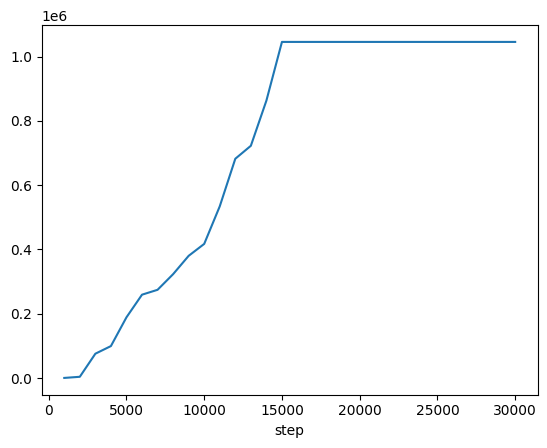

In [65]:
df['total_points'].dropna().plot()

In [51]:
reader.scalars.head()

,step,tag,value
0,1,iter_time,950.286316
1,2,iter_time,91.207680
2,3,iter_time,89.332321
3,4,iter_time,76.576958
4,5,iter_time,72.835907


<Axes: xlabel='step'>

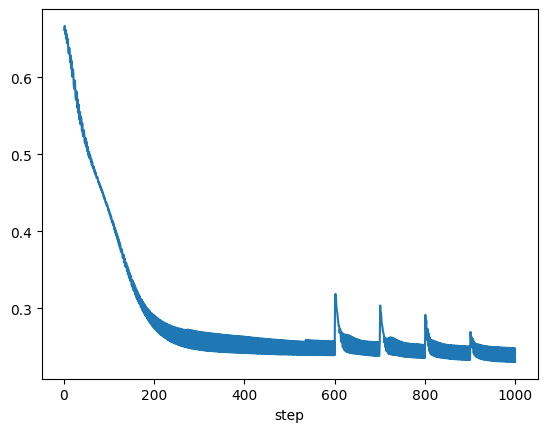

In [52]:
reader.scalars.query('tag=="train_loss_patches/total_loss"').set_index('step').value.plot()

In [49]:
reader.scalars.tag.unique()

array(['iter_time', 'train_loss_patches/l1_loss',
       'train_loss_patches/total_loss'], dtype=object)

In [80]:
!tree data2/

data2/
└── velo
    ├── experiments
    │   └── 8images
    │       ├── convert_args.json
    │       ├── extract_args.json
    │       ├── helper_args.json
    │       └── models
    │           └── 1k_steps
    │               └── train_args.json
    └── images
        ├── 20240425_172506.jpg
        ├── 20240425_172509.jpg
        ├── 20240425_172516.jpg
        ├── 20240425_172542.jpg
        ├── 20240425_172546.jpg
        ├── 20240425_172552.jpg
        ├── 20240425_172557.jpg
        ├── 20240425_172600.jpg
        ├── 20240425_172604.jpg
        ├── 20240425_172611.jpg
        └── 20240425_172614.jpg

7 directories, 15 files
